# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [8]:
# importing needed libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [4]:
# Your code here.
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data.head()

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4


Draw a dispersion diagram (scatter plot) for the data.

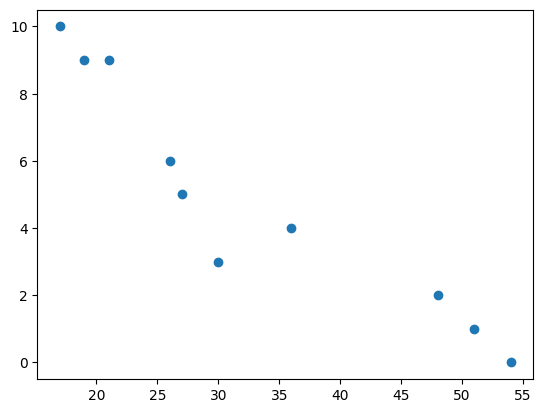

In [6]:
# Your code here.
plt.scatter(x=student_data["Age"], y=student_data["Tardies"])
plt.show()


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

# Your response here. 

It would seem that, at least for these data, the initial hypothesis is correct: there does, indeed, seem to be a strong negative correlation between age of students
and tendency to arrive late.


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [7]:
# Your response here.
#correlation:
print("Correlation -", student_data["Age"].corr(student_data["Tardies"]))

#covariance:
print("Covariance -", student_data["Age"].cov(student_data["Tardies"]))

# Covariance lets you understand if the two variables are related,but since it's calculated in the units of the variables themselves, it can tell you nothing about the magnitude of the relationship.
# On the other hand, correlation (which is nothing more that the covariance of standardized variables), can tells us both about the sign and the magnitude of the relationship.

# In this case, a correlation of -0.94 tells us there is a very strong correlation between the age of a student and the number of times they arrive late
# (although the sample is quite small)

Correlation - -0.9391626886887122
Covariance - -45.56666666666666


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [13]:
# Your response here.
model = linear_model.LinearRegression()
model.fit(student_data[["Age"]], student_data["Tardies"])
print("Coefficient -", model.coef_, "\nIntercept -", model.intercept_)
# The independent variable is age and the dependent is the number of late shows. Using a linear regression as suggested by the plotted data.

Coefficient - [-0.24282077] 
Intercept - 12.888803363135768


Plot your regression model on your scatter plot.

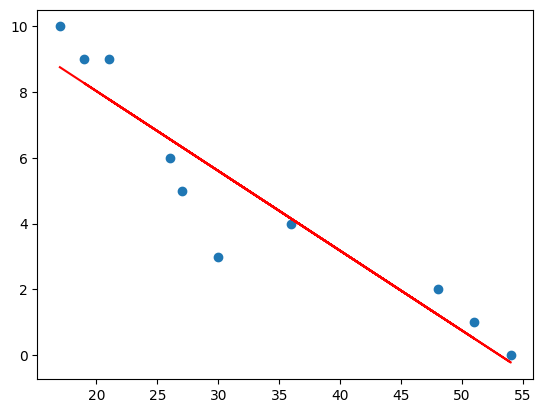

In [23]:
# Your code here.
plt.scatter(student_data["Age"], student_data["Tardies"])
plt.plot(student_data["Age"], model.predict(student_data[["Age"]]), c="red")
plt.show()


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
# Your response here.

#The line seems to be a great fit for the data. For this particular dataset, yes, age seems to be a good predictor of tardiness.


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [24]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("vehicles.csv")
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [27]:
# Your response here. 

vehicles_model = vehicles[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year", "CO2 Emission Grams/Mile"]]

vehicles_model.head()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500


In [32]:
vehicles_model.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [35]:
# Your response here. 
model = linear_model.LinearRegression()
model.fit(vehicles_model[["Fuel Barrels/Year", "Combined MPG"]], vehicles_model["CO2 Emission Grams/Mile"])
print("Coefficient -", model.coef_, "\nIntercept -", model.intercept_)
# I decided to use just two variables - almost all variables apart from Year are strongly correlated with
# our target variable, so I picked the strongest correlations in opposite directions.

Coefficient - [22.19714503 -3.92508164] 
Intercept - 162.669798050799


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [36]:
# Your response here.

print("Model summary:\nCoefficient - " + str(model.coef_) + "\nIntercept - " + str(model.intercept_) + "\nR Score - " + str(model.score(vehicles_model[["Fuel Barrels/Year", "Combined MPG"]], vehicles_model["CO2 Emission Grams/Mile"])))

# Both variables are important. I'm pretty confident in the model, because such high correlations and an R Score of 0.98 are nothing short of amazing.


Model summary:
Coefficient - [22.19714503 -3.92508164]
Intercept - 162.669798050799
R Score - 0.9774643819635159


## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [54]:
# Your code here.

party = pd.DataFrame({"X":[1,3,4,6,8,9,11,14], "Y":[1,2,4,4,5,7,8,13]})
party


,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

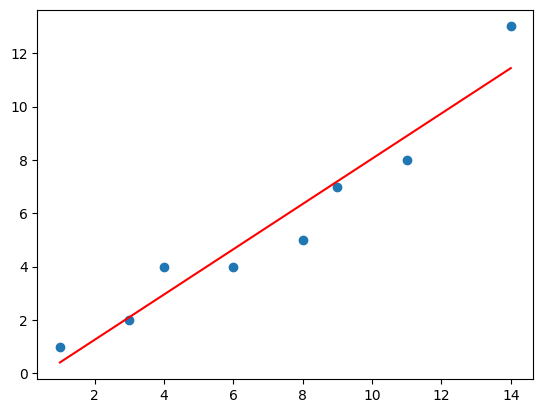

In [43]:
# Your code here.
party_model = linear_model.LinearRegression()
party_model.fit(party[["X"]], party["Y"])
plt.scatter(party["X"], party["Y"])
plt.plot(party["X"], party_model.predict(party[["X"]]), c="red")
plt.show()


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [49]:
# Your response here. 

# Yes, it seems that the more people you invite to a party, the more people are unable to attend (ie, there's a linear relationship). It seems logical if you think about it
# and there would only be something fishy about it if the PROPORTION of people unable to attend was increasing, which is not.

print("Model summary:\nCoefficient - " + str(party_model.coef_) + "\nIntercept - " + str(party_model.intercept_) + "\nR Squared Score - " + str(party_model.score(party[["X"]], party["Y"])))


Model summary:
Coefficient - [0.84848485]
Intercept - -0.43939393939393945
R Squared Score - 0.9316696375519905


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

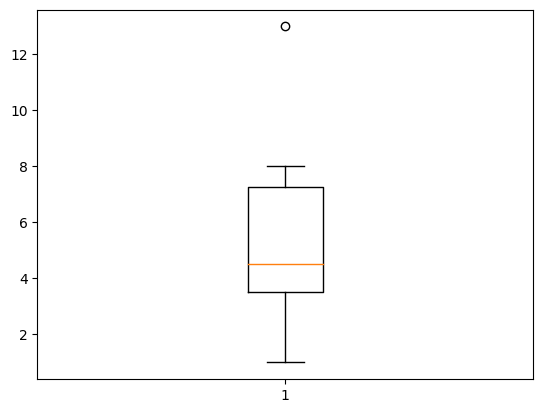

In [50]:
# Your response here. 
plt.boxplot(party["Y"])
plt.show()

In [55]:
# The party with the highest number of guests seems to be an outlier, so let's remove it-

party.drop([7], inplace=True)
party

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8


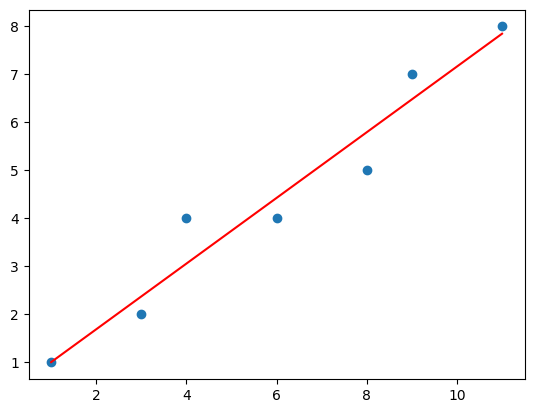

In [56]:
party_model.fit(party[["X"]], party["Y"])
plt.scatter(party["X"], party["Y"])
plt.plot(party["X"], party_model.predict(party[["X"]]), c="red")
plt.show()

In [57]:
print("Model summary:\nCoefficient - " + str(party_model.coef_) + "\nIntercept - " + str(party_model.intercept_) + "\nR Squared Score - " + str(party_model.score(party[["X"]], party["Y"])))

Model summary:
Coefficient - [0.68421053]
Intercept - 0.32330827067669077
R Squared Score - 0.9433811802232854


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 

# Although the coefficient and the intercept have been changed, the goodness of fit remained basically the same, which means the model is still a very good predictor
# of people attending the party
